In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load dataset
url = 'https://raw.githubusercontent.com/LearnDataSci/articles/refs/heads/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners/IMDB-Movie-Data.csv'
data = pd.read_csv(url)
print(data.head())

   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

In [4]:
# Preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'\W+', ' ', text)
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [5]:
# Apply preprocessing
data['cleaned_reviews'] = data['Description'].apply(preprocess_text)
print(data['cleaned_reviews'])

0      group intergalactic criminals forced work toge...
1      following clues origin mankind team finds stru...
2      three girls kidnapped man diagnosed 23 distinc...
3      city humanoid animals hustling theater impresa...
4      secret government agency recruits dangerous in...
                             ...                        
995    tight knit team rising investigators along sup...
996    three american college students studying abroa...
997    romantic sparks occur two dance students diffe...
998    pair friends embark mission reunite pal woman ...
999    stuffy businessman finds trapped inside body f...
Name: cleaned_reviews, Length: 1000, dtype: object


In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
def analyze_sentiment(review):
    sentiment = sia.polarity_scores(review)
    return 'positive' if sentiment['compound'] > 0 else 'negative' if sentiment['compound'] < 0 else 'neutral'

data['sentiment'] = data['cleaned_reviews'].apply(analyze_sentiment)
print(data['sentiment'])

0      negative
1      negative
2      negative
3      positive
4      negative
         ...   
995    negative
996    negative
997    positive
998    positive
999    negative
Name: sentiment, Length: 1000, dtype: object


In [8]:
import spacy

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

In [9]:
# Named Entity Recognition function
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER
data['entities'] = data['cleaned_reviews'].apply(extract_entities)
print(data['entities'])

0                                                     []
1                                                     []
2      [(three, CARDINAL), (23, CARDINAL), (24th, ORD...
3                                                     []
4                                     [(first, ORDINAL)]
                             ...                        
995                                    [(one, CARDINAL)]
996    [(three, CARDINAL), (american college, ORG), (...
997                                    [(two, CARDINAL)]
998                                                   []
999                                                   []
Name: entities, Length: 1000, dtype: object


In [10]:
!pip install rake-nltk

In [11]:
from rake_nltk import Rake

# Initialize RAKE
r = Rake()

In [12]:
# Key phrase extraction function
def extract_key_phrases(text):
    r.extract_keywords_from_text(text)
    return r.get_ranked_phrases()

# Apply key phrase extraction
data['key_phrases'] = data['cleaned_reviews'].apply(extract_key_phrases)
print(data['key_phrases'])

0      [group intergalactic criminals forced work tog...
1      [following clues origin mankind team finds str...
2      [three girls kidnapped man diagnosed 23 distin...
3      [city humanoid animals hustling theater impres...
4      [secret government agency recruits dangerous i...
                             ...                        
995    [tight knit team rising investigators along su...
996    [three american college students studying abro...
997    [romantic sparks occur two dance students diff...
998    [pair friends embark mission reunite pal woman...
999    [stuffy businessman finds trapped inside body ...
Name: key_phrases, Length: 1000, dtype: object


In [19]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.5 MB/s eta 0:00:00


In [20]:
from deep_translator import GoogleTranslator

# Function to detect if translation is needed
def detect_language(text):
    # Assuming English as the target language ('en')
    return GoogleTranslator(source='auto').translate(text, target='en')

# Translation function
def translate_review(text, dest_lang='en'):
    return GoogleTranslator(source='auto', target=dest_lang).translate(text)

# Apply translation where needed
data['translated_reviews'] = data['Description'].apply(lambda x: translate_review(x, 'en') if detect_language(x) != x else x)

In [21]:
print(data['translated_reviews'])

0      A group of intergalactic criminals are forced ...
1      Following clues to the origin of mankind, a te...
2      Three girls are kidnapped by a man with a diag...
3      In a city of humanoid animals, a hustling thea...
4      A secret government agency recruits some of th...
                             ...                        
995    A tight-knit team of rising investigators, alo...
996    Three American college students studying abroa...
997    Romantic sparks occur between two dance studen...
998    A pair of friends embark on a mission to reuni...
999    A stuffy businessman finds himself trapped ins...
Name: translated_reviews, Length: 1000, dtype: object


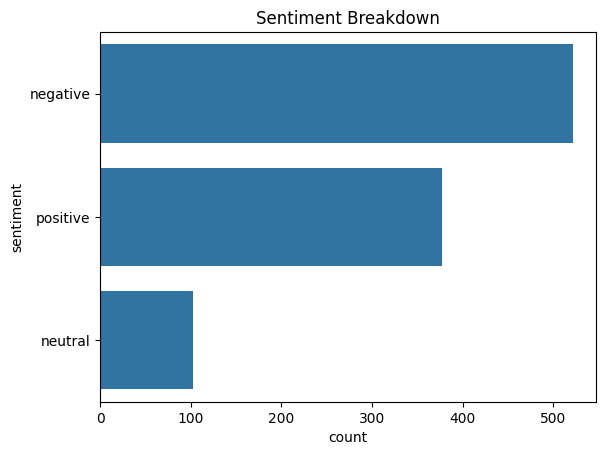

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sns.countplot(data['sentiment'])
plt.title('Sentiment Breakdown')
plt.show()

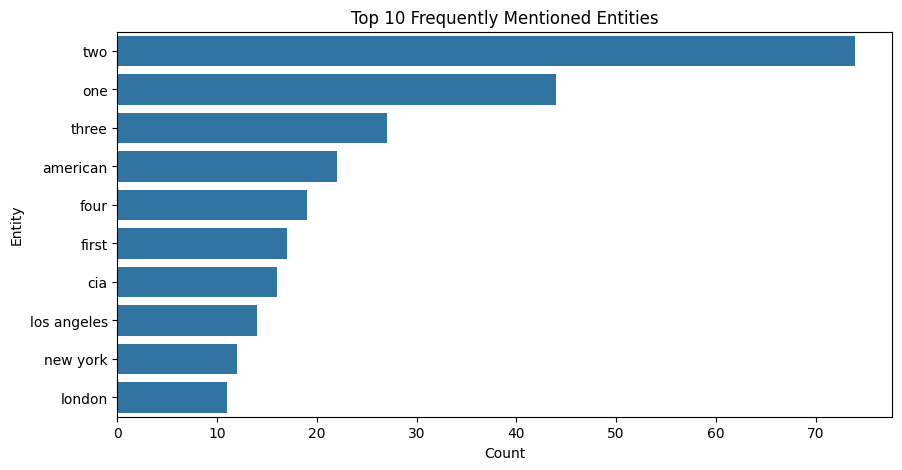

In [39]:
from collections import Counter

# Flatten the list of entities
all_entities = [entity for sublist in data['entities'] for entity in sublist]

# Count the frequency of each entity
entity_counts = Counter([entity[0] for entity in all_entities])
most_common_entities = entity_counts.most_common(10)  # Get the top 10 entities

# Convert to DataFrame for easier plotting
entities_df = pd.DataFrame(most_common_entities, columns=['Entity', 'Count'])

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Entity', data=entities_df)
plt.title('Top 10 Frequently Mentioned Entities')
plt.show()

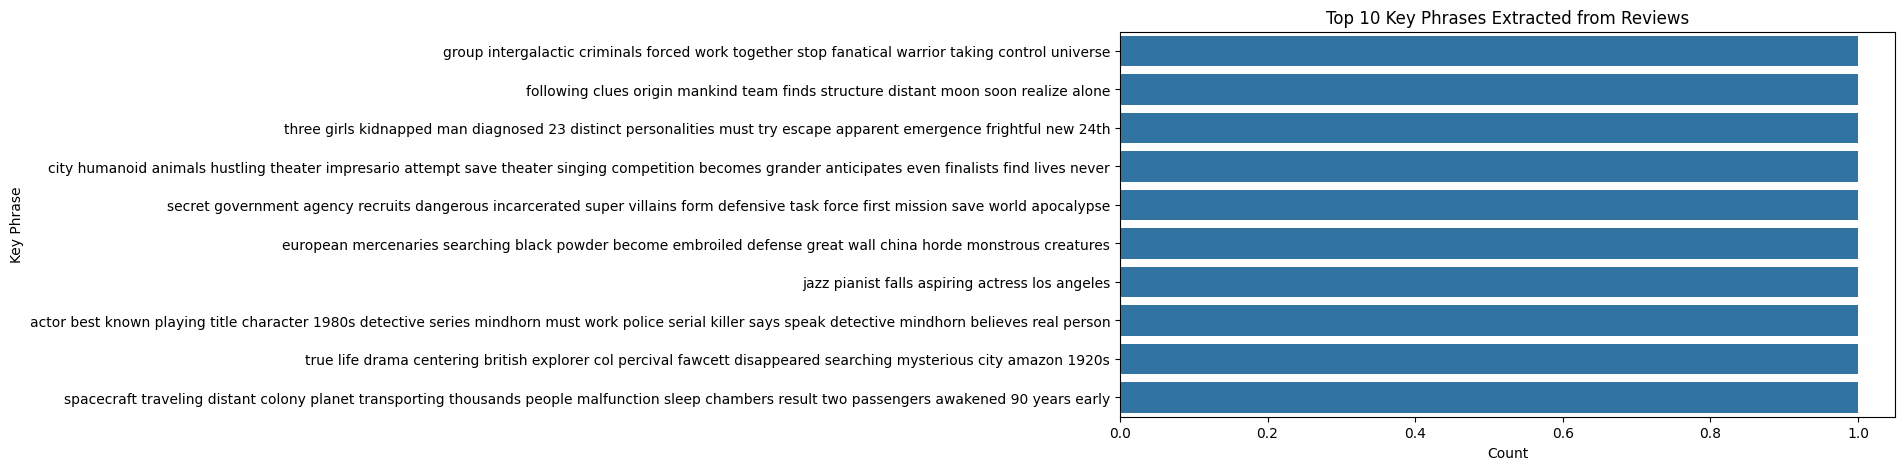

In [41]:
# Flatten the list of key phrases
all_key_phrases = [phrase for sublist in data['key_phrases'] for phrase in sublist]

# Count the frequency of each key phrase
key_phrase_counts = Counter(all_key_phrases)
most_common_key_phrases = key_phrase_counts.most_common(10)  # Get the top 10 key phrases

# Convert to DataFrame for easier plotting
key_phrases_df = pd.DataFrame(most_common_key_phrases, columns=['Key Phrase', 'Count'])

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Key Phrase', data=key_phrases_df)
plt.title('Top 10 Key Phrases Extracted from Reviews')
plt.show()

In [42]:
# Apply sentiment analysis to the original reviews
data['original_sentiment'] = data['Description'].apply(analyze_sentiment)

# Apply sentiment analysis to the translated reviews
data['translated_sentiment'] = data['translated_reviews'].apply(analyze_sentiment)

In [43]:
comparison_df = data[['original_sentiment', 'translated_sentiment']]
comparison_df['match'] = comparison_df['original_sentiment'] == comparison_df['translated_sentiment']

<ipython-input-43-30d9b7718d3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df['match'] = comparison_df['original_sentiment'] == comparison_df['translated_sentiment']


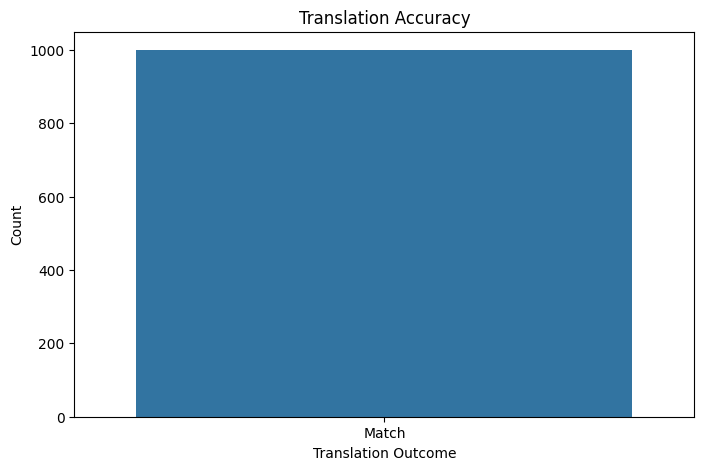

In [44]:
# Count matches and mismatches
accuracy_counts = comparison_df['match'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=accuracy_counts.index.map({True: 'Match', False: 'Mismatch'}), y=accuracy_counts.values)
plt.title('Translation Accuracy')
plt.ylabel('Count')
plt.xlabel('Translation Outcome')
plt.show()

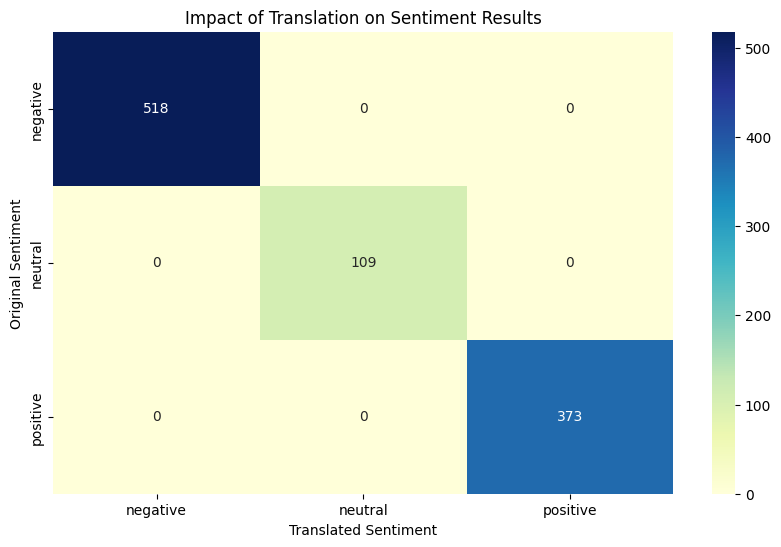

In [45]:
# Group by original and translated sentiment to see the distribution
sentiment_impact = comparison_df.groupby(['original_sentiment', 'translated_sentiment']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_impact, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Impact of Translation on Sentiment Results')
plt.ylabel('Original Sentiment')
plt.xlabel('Translated Sentiment')
plt.show()

In [46]:
# Calculate the sentiment counts
sentiment_counts = data['sentiment'].value_counts(normalize=True) * 100  # Get percentages

# Convert to DataFrame for easier plotting
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['Sentiment', 'Percentage']

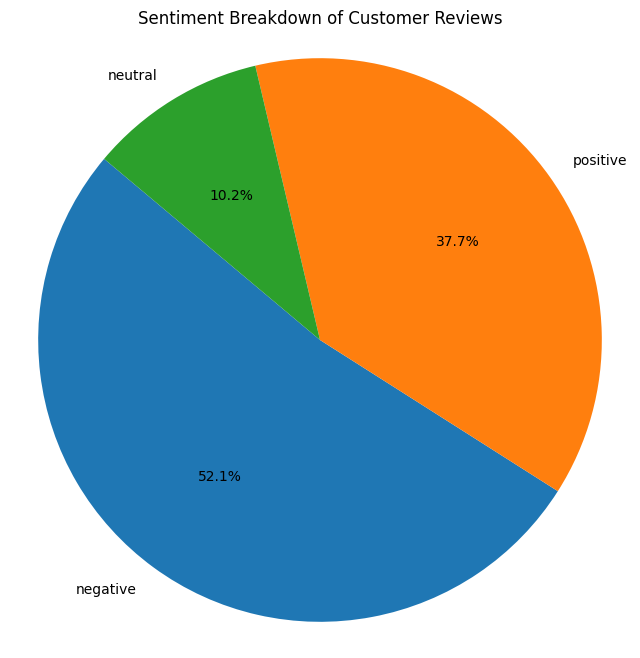

In [47]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_df['Percentage'], labels=sentiment_df['Sentiment'], autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Breakdown of Customer Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

<ipython-input-48-7afcf50e8a63>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Percentage', data=sentiment_df, palette='viridis')


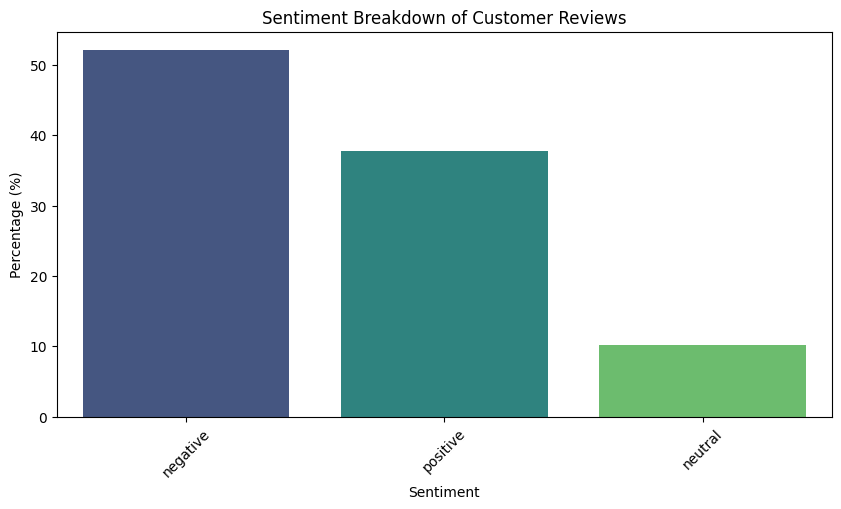

In [48]:
# Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Sentiment', y='Percentage', data=sentiment_df, palette='viridis')
plt.title('Sentiment Breakdown of Customer Reviews')
plt.ylabel('Percentage (%)')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)
plt.show()